In [1]:
import pandas as pd

data = pd.read_csv('reviews.csv')
data = data.head(10000)
data.tail()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
9995,2022-06-17 09:34:24,Please make sure that the panels don't lag on ...,3,0,NaN
9996,2022-06-17 09:32:57,"This app has become a problem, why do you alwa...",1,0,NaN
9997,2022-06-17 09:20:21,"The app is good, but the lyric won't show for ...",5,0,NaN
9998,2022-06-17 09:17:26,Good App..Doesn't have ads between songs and h...,4,0,NaN
9999,2022-06-17 09:14:54,Impossible to use on lock screen anymore. Trie...,2,0,NaN


In [2]:
data.isnull().sum()

Time_submitted       0
Review               0
Rating               0
Total_thumbsup       0
Reply             9979
dtype: int64

In [3]:
data.drop(['Time_submitted', 'Reply'], axis=1, inplace=True)
data.isnull().sum()

Review            0
Rating            0
Total_thumbsup    0
dtype: int64

<Axes: xlabel='Rating', ylabel='count'>

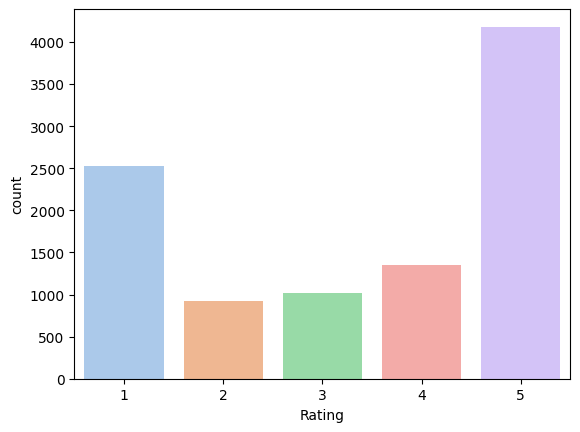

In [4]:
import seaborn as sns

sns.countplot(x='Rating', data=data, palette='pastel')


In [5]:
def transform_rating(rating):
    if rating == 5 or rating == 4:
        return 'Good'
    if rating == 3:
        return 'Neutral'
    if rating == 2 or rating == 1:
        return 'Bad'

,Review,Rating,Total_thumbsup,Desc,length
0,"Great music service, the audio is high quality...",5,2,Good,112
1,Please ignore previous negative rating. This a...,5,1,Good,86
2,"This pop-up ""Get the best Spotify experience o...",4,0,Good,106
3,Really buggy and terrible to use as of recently,1,1,Bad,47
4,Dear Spotify ... why do I get songs that I di...,1,1,Bad,105


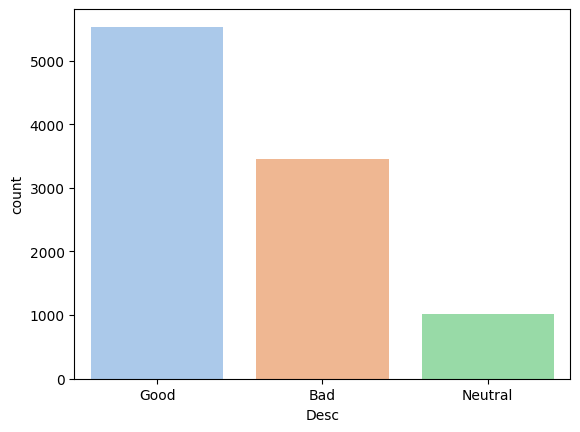

In [6]:
data['Desc'] = data['Rating'].apply(transform_rating)
data['length'] = data['Review'].str.len()
sns.countplot(x='Desc', data=data, palette='pastel')
data.head()

<Axes: xlabel='length', ylabel='Total_thumbsup'>

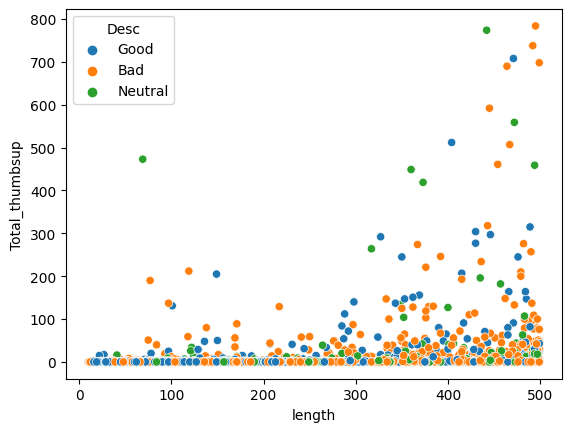

In [7]:
sns.scatterplot(x=data['length'][data.length < 500],
                y=data['Total_thumbsup'][data.Total_thumbsup < 800],
                hue=data['Desc'])

You should consider upgrading via the 'h:\Timedoor Project\AI Dev Practive\Sentient_Analysis\.venv\Scripts\python.exe -m pip install --upgrade pip' command.


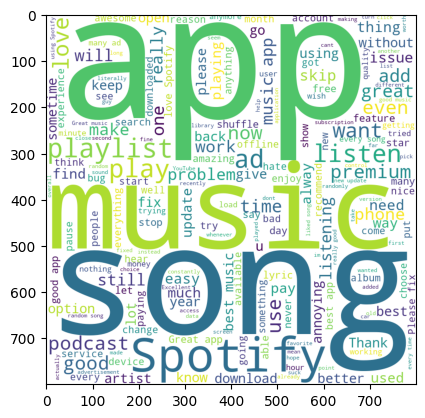

In [8]:
%pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

reviews = " ".join(data.loc[:, 'Review'])
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(reviews)

plt.imshow(wordcloud)

In [10]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

data.loc[:, 'Review'] = data.loc[:, 'Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data.loc[:, 'Review'] = data.loc[:, 'Review'].apply(lambda word: re.sub('[^a-zA-Z0-9\s]', '', word))

stop_words = stopwords.words('english')
data.loc[:, 'Review'] = data.loc[:, 'Review'].apply(lambda word: " ".join(word for word in word.split() if word not in stop_words))

stemmer = PorterStemmer()
data.loc[:, 'Review'] = data.loc[:, 'Review'].apply(lambda word: " ".join([stemmer.stem(word) for word in word.split()]))

data.head()['Review']

0    great music servic audio high qualiti app easi...
1    pleas ignor previou neg rate app super great g...
2    popup get best spotifi experi android 12 annoy...
3                      realli buggi terribl use recent
4    dear spotifi get song didnt put playlist shuff...
Name: Review, dtype: object

In [12]:
from sklearn.model_selection import train_test_split

X = data['Review']
y = data['Desc']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7500,), (2500,), (7500,), (2500,))

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

y_train

array([2, 1, 1, ..., 0, 1, 1], dtype=int64)

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

cv = CountVectorizer() 
cv.fit(X_train)
X_train_count = cv.transform(X_train)
X_test_count = cv.transform(X_test)

print(X_train_count)

  (0, 320)	1
  (0, 3013)	1
  (0, 3320)	1
  (0, 3879)	1
  (0, 3895)	1
  (0, 4766)	1
  (0, 5579)	1
  (1, 550)	1
  (1, 2010)	1
  (1, 3129)	1
  (1, 3635)	1
  (1, 3803)	1
  (1, 4884)	1
  (2, 1816)	1
  (2, 1930)	1
  (2, 2336)	1
  (2, 3412)	1
  (3, 9)	1
  (3, 749)	1
  (3, 2302)	1
  (3, 2955)	1
  (3, 3037)	1
  (3, 3690)	1
  (3, 3802)	1
  (3, 3809)	1
  :	:
  (7497, 3497)	1
  (7497, 3606)	1
  (7497, 3608)	1
  (7497, 3648)	1
  (7497, 3974)	1
  (7497, 4050)	2
  (7497, 4185)	1
  (7497, 4619)	2
  (7497, 4751)	1
  (7497, 4804)	1
  (7497, 5171)	1
  (7497, 5330)	1
  (7497, 5369)	1
  (7497, 5579)	2
  (7497, 5705)	1
  (7497, 5776)	2
  (7497, 5809)	1
  (7497, 5844)	1
  (7497, 5913)	1
  (7498, 839)	1
  (7498, 3895)	1
  (7498, 4766)	1
  (7499, 705)	1
  (7499, 3943)	1
  (7499, 4955)	1


In [16]:
tfidf = TfidfVectorizer(analyzer='char', ngram_range=(2, 3))
tfidf.fit(X_train)

X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(X_train_tfidf)

  (0, 6980)	0.1399931615456818
  (0, 6977)	0.13883627952303554
  (0, 6902)	0.1511780833474245
  (0, 6874)	0.08971468359733314
  (0, 6436)	0.1245809363675211
  (0, 6431)	0.07766044873791025
  (0, 5948)	0.1168385267913869
  (0, 5922)	0.05747182151461003
  (0, 5862)	0.0682186581861136
  (0, 5847)	0.16005547168548406
  (0, 5846)	0.13237160032215212
  (0, 5818)	0.09399928091360724
  (0, 5808)	0.08174997030776296
  (0, 5702)	0.12853594984323763
  (0, 5701)	0.0976834509542278
  (0, 5637)	0.25457748129456825
  (0, 5609)	0.11125203860883823
  (0, 5157)	0.19683724376328687
  (0, 5155)	0.17558479365774526
  (0, 4865)	0.0934366504663125
  (0, 4856)	0.07035122831555864
  (0, 4502)	0.09202601353116902
  (0, 4501)	0.0865447298202988
  (0, 4278)	0.2330531785448191
  (0, 4266)	0.1199917119204776
  :	:
  (7499, 5862)	0.15458735798315418
  (7499, 5176)	0.19224587703811669
  (7499, 5173)	0.1112685804987844
  (7499, 4765)	0.19310507873235658
  (7499, 4761)	0.12839240596940524
  (7499, 4039)	0.1614594888489